In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import os
import csv
import urllib.request
import colorama
from colorama import Fore, Style
%matplotlib inline

<font face="微软雅黑" size=5 color=#A52A2A >Task1: API chosen   
<font face="微软雅黑" size=3 color=BLACK>
    A single API chosen for this assignment is from **https://coronavirus.data.gov.uk/** \
    Specifically, the historical Covid-19 data can be downloaded as required in https://coronavirus.data.gov.uk/details/download \
    As for my work, since the structure and filters' API options can be reflected in **URL**, the dataset I need can be directly draw from that with various features input, which focus on 4 nations'(**England/Wales/Scotland/North Ireland**) before **28/02/2021**. \
 <font face="微软雅黑" size=3 color=#A52A2A >(have to set **Archive** at date **01/03/2021**, otherwise the Deaths(daily,cumulative) won't be recorded at the very day)
   

In [2]:
from requests import get
from json import dumps
import json

def get_data(url): #return dictionary
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400: #status code over 400 mention "error"
        raise RuntimeError(f'Request failed: { response.text }')
    return response.json()
    

In [3]:
#if __name__ == '__main__':
endpoint = (
        'https://api.coronavirus.data.gov.uk/v2/data?'
        #main endpoint to download data related to Coronavirus in the UK 
         'areaType=nation&' #nation range
      
        'metric=cumCasesByPublishDate&metric=cumDeathsByDeathDate&metric=newCasesByPublishDate&'
        'metric=newDeathsByDeathDate&metric=cumTestsByPublishDate&metric=newTestsByPublishDate&metric=covidOccupiedMVBeds&' 
        'metric=hospitalCases&metric=newAdmissions&format=json&release=2021-03-01')
        #'features chosen for data before '28/02/2021'
raw_dict = get_data(endpoint)
print(raw_dict)

{'length': 1696, 'body': [{'date': '2021-03-01', 'areaType': 'nation', 'areaCode': 'N92000002', 'areaName': 'Northern Ireland', 'cumCasesByPublishDate': 112631, 'cumDeathsByDeathDate': None, 'newCasesByPublishDate': 138, 'newDeathsByDeathDate': None, 'cumTestsByPublishDate': None, 'newTestsByPublishDate': None, 'covidOccupiedMVBeds': None, 'hospitalCases': None, 'newAdmissions': None}, {'date': '2021-02-28', 'areaType': 'nation', 'areaCode': 'N92000002', 'areaName': 'Northern Ireland', 'cumCasesByPublishDate': 112493, 'cumDeathsByDeathDate': None, 'newCasesByPublishDate': 136, 'newDeathsByDeathDate': None, 'cumTestsByPublishDate': 1650954, 'newTestsByPublishDate': 2926, 'covidOccupiedMVBeds': None, 'hospitalCases': None, 'newAdmissions': None}, {'date': '2021-02-27', 'areaType': 'nation', 'areaCode': 'N92000002', 'areaName': 'Northern Ireland', 'cumCasesByPublishDate': 112357, 'cumDeathsByDeathDate': None, 'newCasesByPublishDate': 184, 'newDeathsByDeathDate': None, 'cumTestsByPublishDa

<font face="微软雅黑" size=5 color=#A52A2A >Task2: Collect and store data in JSON format \
<font face="微软雅黑" size=3 color=BLACK>
    Function below for store the URL response in .json file, and load it for further use

In [4]:
def create_file (file_name, data): 
    with open(file_name, 'w') as outfile:
        json.dump(data, outfile)
    print(Fore.BLUE + 'Dataset saved in "%s"'%(file_name))
    outfile.close()

def load_file(file_name):
    with open(file_name) as json_file:
        data = json.load(json_file)
        new_data=json.dumps(data,indent = 2)
    print(Fore.BLUE + 'Dataset "%s" loaded as below:'%(file_name))
    print(Fore.BLACK+ new_data)
    json_file.close()
    return data

In [5]:
create_file('raw_data.json',raw_dict['body'])
raw_data=load_file('raw_data.json')

Dataset saved in "raw_data.json"
Dataset "raw_data.json" loaded as below:
[
  {
    "date": "2021-03-01",
    "areaType": "nation",
    "areaCode": "N92000002",
    "areaName": "Northern Ireland",
    "cumCasesByPublishDate": 112631,
    "cumDeathsByDeathDate": null,
    "newCasesByPublishDate": 138,
    "newDeathsByDeathDate": null,
    "cumTestsByPublishDate": null,
    "newTestsByPublishDate": null,
    "covidOccupiedMVBeds": null,
    "hospitalCases": null,
    "newAdmissions": null
  },
  {
    "date": "2021-02-28",
    "areaType": "nation",
    "areaCode": "N92000002",
    "areaName": "Northern Ireland",
    "cumCasesByPublishDate": 112493,
    "cumDeathsByDeathDate": null,
    "newCasesByPublishDate": 136,
    "newDeathsByDeathDate": null,
    "cumTestsByPublishDate": 1650954,
    "newTestsByPublishDate": 2926,
    "covidOccupiedMVBeds": null,
    "hospitalCases": null,
    "newAdmissions": null
  },
  {
    "date": "2021-02-27",
    "areaType": "nation",
    "areaCode": "N92000

<font face="微软雅黑" size=5 color=#A52A2A >Task3: Represent the data more clearly. Apply any pre-processing steps to clean/filter/combine the data 

In [6]:
#clean/filter/combine the data 
df=pd.DataFrame(raw_data)
df.head(5)

,date,areaType,areaCode,areaName,cumCasesByPublishDate,cumDeathsByDeathDate,newCasesByPublishDate,newDeathsByDeathDate,cumTestsByPublishDate,newTestsByPublishDate,covidOccupiedMVBeds,hospitalCases,newAdmissions
0,2021-03-01,nation,N92000002,Northern Ireland,112631.0,NaN,138,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-28,nation,N92000002,Northern Ireland,112493.0,NaN,136,NaN,1650954.0,2926.0,NaN,NaN,NaN
2,2021-02-27,nation,N92000002,Northern Ireland,112357.0,NaN,184,NaN,1648028.0,3714.0,NaN,NaN,NaN
3,2021-02-26,nation,N92000002,Northern Ireland,112173.0,NaN,241,NaN,1644314.0,4266.0,29.0,NaN,NaN
4,2021-02-25,nation,N92000002,Northern Ireland,111932.0,NaN,281,NaN,1640048.0,11112.0,32.0,335.0,5.0


In [7]:
df.tail(5)

,date,areaType,areaCode,areaName,cumCasesByPublishDate,cumDeathsByDeathDate,newCasesByPublishDate,newDeathsByDeathDate,cumTestsByPublishDate,newTestsByPublishDate,covidOccupiedMVBeds,hospitalCases,newAdmissions
1691,2020-01-07,nation,S92000003,Scotland,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1692,2020-01-06,nation,S92000003,Scotland,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1693,2020-01-05,nation,S92000003,Scotland,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1694,2020-01-04,nation,S92000003,Scotland,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1695,2020-01-03,nation,S92000003,Scotland,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum() 

date                        0
areaType                    0
areaCode                    0
areaName                    0
cumCasesByPublishDate     206
cumDeathsByDeathDate     1332
newCasesByPublishDate       0
newDeathsByDeathDate     1332
cumTestsByPublishDate     657
newTestsByPublishDate     676
covidOccupiedMVBeds       335
hospitalCases             310
newAdmissions             289
dtype: int64

In [9]:
pd.options.mode.chained_assignment = None #suppress warning 'SettingWithCopyWarning'

#seperate them into 4 different parts of dataset,because in raw data 4 nations' dataset are continous
#when I use bfill() for cumulative missing values, raw data has a chance to create a mess
df_c_WL=df[df['areaName']=='Wales'].copy() 
df_c_EN=df[df['areaName']=='England'].copy()
df_c_NI=df[df['areaName']=='Northern Ireland'].copy()
df_c_SC=df[df['areaName']=='Scotland'].copy()

<font face="微软雅黑" size=5 color=BLACK>Data Reshape: \
<font face="微软雅黑" size=3 color=BLACK>Add three new features: \
   **Severe_Rate=covidOccupiedMVBeds/hospitalCases** \
**Fatality_Rate=cumDeathsByDeathDate/cumCasesByPublishDate**  
    **Treatment_Rate=newAdmissions/newCasesByPublishDate** \
    Remove: \
    **covidOccupiedMVBeds** \
   **hospitalCases** \
    **areaType** \
    **areaCode** \
    **areaName**

In [10]:
def data_reshape(df):
    df=df.drop(df[df['date']=='2021-03-01'].index) #delete 01/03/2021 item, only need those before 28/02/2021
    df.dropna(thresh=6,inplace=True) 
    #at the pandemic beginning, those with many NaN or 0 are useless infomation, set non-NaN threshold=6
    #tail from 2020-01-03 to almost the begining of Feb
    df["newDeathsByDeathDate"].fillna(0,inplace=True) #by observation it's safe to these missing values apply '0'
    df["newTestsByPublishDate"].fillna(0,inplace=True)
    df["newAdmissions"].fillna(0,inplace=True)
    df["hospitalCases"].fillna(0,inplace=True)
    df["covidOccupiedMVBeds"].fillna(0,inplace=True)
    df.tail(1)["cumCasesByPublishDate"].fillna(0,inplace=True)#set the first useful cumulative value NaN as 0
    df.tail(1)["cumDeathsByDeathDate"].fillna(0,inplace=True)
    df.tail(1)["cumTestsByPublishDate"].fillna(0,inplace=True)
    #backwardfill for possible missing cumulative values, for that if new is NaN, cumulative will be NaN
    df["cumCasesByPublishDate"].fillna(method="bfill",inplace=True) 
    df["cumDeathsByDeathDate"].fillna(method="bfill",inplace=True)
    df["cumTestsByPublishDate"].fillna(method="bfill",inplace=True)
    
    df['Severe_Rate']=True #add new columns 
    df['Fatality_Rate']=True
    df['Treatment_Rate']=True

    df['Severe_Rate']=df['covidOccupiedMVBeds']/df['hospitalCases']
    df['Fatality_Rate']=df['cumDeathsByDeathDate']/df['cumCasesByPublishDate']
    df['Treatment_Rate']=df['newAdmissions']/df['newCasesByPublishDate']
    
    df=df.replace([py.inf, -py.inf], py.nan) #avoid 0/0, NaN/NaN 
    df['Severe_Rate'].fillna(0,inplace=True)
    df['Fatality_Rate'].fillna(0,inplace=True)
    df['Treatment_Rate'].fillna(0,inplace=True)

    df.drop('covidOccupiedMVBeds',axis=1,inplace=True) #no need to keep
    df.drop('hospitalCases',axis=1,inplace=True)
    df.drop('areaType',axis=1,inplace=True) 
    df.drop('areaCode',axis=1,inplace=True)
    df.drop('areaName',axis=1,inplace=True)
    return df

In [11]:
df_c_SC=data_reshape(df_c_SC)
df_c_EN=data_reshape(df_c_EN)
df_c_NI=data_reshape(df_c_NI)
df_c_WL=data_reshape(df_c_WL)

df_c_SC.isnull().sum() #for check
#df_c_EN.isnull().sum()
#df_c_NI.isnull().sum()
#df_c_WL.isnull().sum()

date                     0
cumCasesByPublishDate    0
cumDeathsByDeathDate     0
newCasesByPublishDate    0
newDeathsByDeathDate     0
cumTestsByPublishDate    0
newTestsByPublishDate    0
newAdmissions            0
Severe_Rate              0
Fatality_Rate            0
Treatment_Rate           0
dtype: int64

In [12]:
#df_c_WL.tail(20) #for check
#df_c_EN.tail(20)
#df_c_NI.tail(20)
#df_c_SC.tail(20)

In [13]:
#df_c_WL.head(20) #for check
#df_c_EN.head(20)
#df_c_NI.head(20)
#df_c_SC.head(20)

In [14]:
def get_semi_month(df):
    df['date']= pd.to_datetime(df['date'])
    semimonthly =df.groupby([pd.Grouper(key='date',freq='SM')])
    avg_semimonth = semimonthly.mean() #create a new DF based on the mean of the groupby object created above
    return avg_semimonth

In [15]:
df_c_WL_SM=get_semi_month(df_c_WL).copy() 
df_c_EN_SM=get_semi_month(df_c_EN).copy() 
df_c_NI_SM=get_semi_month(df_c_NI).copy() 
df_c_SC_SM=get_semi_month(df_c_SC).copy() 

In [16]:
#df_c_SC_SM.head(20)
#df_c_EN_SM.head(20)
#df_c_NI_SM.head(20)
#df_c_WL_SM.head(20)

In [17]:
#df_c_SC_SM.tail(20)
#df_c_EN_SM.tail(20)
#df_c_NI_SM.tail(20)
#df_c_WL_SM.tail(20)

In [18]:
#df_c_SC_SM.describe()
#df_c_EN_SM.describe()
#df_c_NI_SM.describe()
#df_c_WL_SM.describe()

<font face="微软雅黑" size=5 color=#A52A2A >Task4: Visualization and Analysis

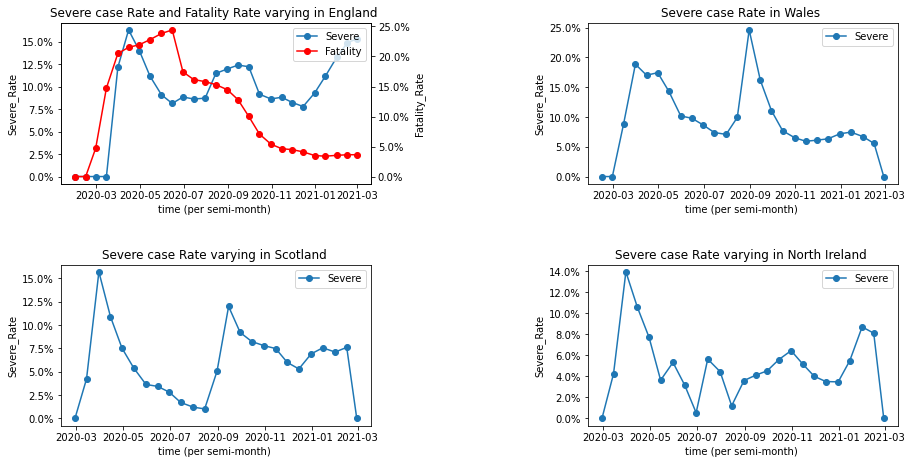

In [19]:
from matplotlib import pyplot as plt
from matplotlib import ticker

fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(221) #England data
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax1.plot(df_c_EN_SM['Severe_Rate'], marker="o",label='Severe')
ax1.set_ylabel('Severe_Rate')
ax2=ax1.twinx()
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax2.plot(df_c_EN_SM['Fatality_Rate'], marker="o",color='r',label='Fatality')
ax2.set_ylabel('Fatality_Rate')
ax1.set_xlabel('time (per semi-month) ')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax1.set_title('Severe case Rate and Fatality Rate varying in England ')


ax1=fig.add_subplot(222) #Wales data
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax1.plot(df_c_WL_SM['Severe_Rate'], marker="o",label='Severe')
ax1.set_ylabel('Severe_Rate')
ax1.set_xlabel('time (per semi-month) ')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,labels,loc=0)
ax1.set_title('Severe case Rate in Wales ')

ax1=fig.add_subplot(223) #Scotland data
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax1.plot(df_c_SC_SM['Severe_Rate'], marker="o",label='Severe')
ax1.set_ylabel('Severe_Rate')
ax1.set_xlabel('time (per semi-month) ')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines , labels,loc=0)
ax1.set_title('Severe case Rate varying in Scotland ')

ax1=fig.add_subplot(224) #North Ireland data
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax1.plot(df_c_NI_SM['Severe_Rate'], marker="o",label='Severe')
ax1.set_ylabel('Severe_Rate')
ax1.set_xlabel('time (per semi-month) ')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines , labels,loc=0)

ax1.set_title('Severe case Rate varying in North Ireland ')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.7, hspace=0.5)
plt.show()

<font face="微软雅黑" size=3 color=BLUE >Having checked the raw data, deaths(daily,cumulative) in **Wales/Scotland/North Ireland** are **NOT** recorded, thus I can only draw *Fatality Rate* for **England**. Also an abnormal *Severe Case Rate* drop in 2021-02~2021-03 of **Wales/Scotland/North Ireland**  is for the missing data(covidOccupiedMVBeds/hospitalCases=0/0). \
From plot above, as for England the *Severe Case Rate* fluctuate at range from **10%** to **16%**, the *Fatality Rate* is rocket to approximate **25%** at the beginning of pandemic, finally drop to a stable **3%**. \
In March 2020, UK gov promoted the so-called 'Herd immunity' theorem and didn't plan to take serious measures, which made \
both *Severe Case Rate* and *Fatality Rate* rised dramatically in each nation.

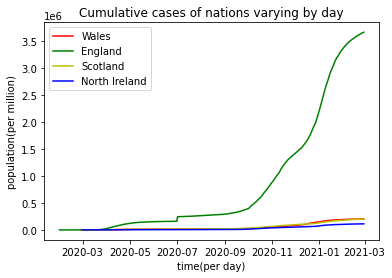

In [20]:
plt.plot(df_c_WL['date'],df_c_WL['cumCasesByPublishDate'],'r')
plt.plot(df_c_EN['date'],df_c_EN['cumCasesByPublishDate'],'g')
plt.plot(df_c_SC['date'],df_c_SC['cumCasesByPublishDate'],'y')
plt.plot(df_c_NI['date'],df_c_NI['cumCasesByPublishDate'],'b')
plt.legend(['Wales', 'England', 'Scotland', 'North Ireland'], loc='upper left')
plt.xlabel('time(per day)')
plt.ylabel('population(per million)')
plt.title('Cumulative cases of nations varying by day')
plt.show()

<font face="微软雅黑" size=3 color=BLUE >The plot above shows **England** is much more hurt and much more significant to the UK data in this pandemic compared with other three nations,<font face="微软雅黑" size=3 color=RED> I plan to focus on it in further analysis for its status and data integrity.<font face="微软雅黑" size=3 color=BLUE >Here also what I find a bit strange is that a small burst at 2020-07. I checked the raw data, it shows:\
<font face="微软雅黑" size=3 color=Green >{'date': '2020-07-02', 'areaType': 'nation', 'areaCode': 'E92000001', 'areaName': 'England', 'cumCasesByPublishDate': <div class="alert-warning">243910</div>, 'cumDeathsByDeathDate': 39845, 'newCasesByPublishDate': 523, 'newDeathsByDeathDate': 86, 'cumTestsByPublishDate': None, 'newTestsByPublishDate': None, 'covidOccupiedMVBeds': 211, 'hospitalCases': 2410, 'newAdmissions': 149} \
{'date': '2020-07-01', 'areaType': 'nation', 'areaCode': 'E92000001', 'areaName': 'England', 'cumCasesByPublishDate': 
 <div class="alert-warning">160764</div>, 'cumDeathsByDeathDate': 39759, 'newCasesByPublishDate': 177, 'newDeathsByDeathDate': 79, 'cumTestsByPublishDate': None, 'newTestsByPublishDate': None, 'covidOccupiedMVBeds': 220, 'hospitalCases': 2509, 'newAdmissions': 201}
<font face="微软雅黑" size=3 color=BLUE >  
There's an approximate 80000 gap in data, by observing 'new case' data i feel it a bit doubtful, usually **cumulative case=new case 
at the very day+cumulative case at the last day**

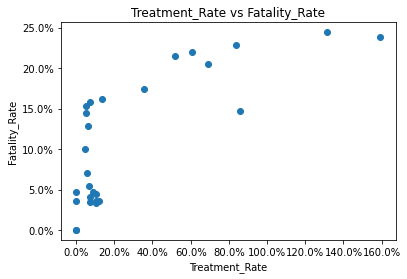

In [21]:
fig=plt.figure(figsize=(6,4))
ax3=fig.add_subplot(111)
ax3.scatter(df_c_EN_SM['Treatment_Rate'], df_c_EN_SM['Fatality_Rate'])
ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax3.set_xlabel('Treatment_Rate')
ax3.set_ylabel('Fatality_Rate')
ax3.set_title('Treatment_Rate vs Fatality_Rate')
plt.show()

<font face="微软雅黑" size=3 color=BLUE >We can observe some relationship here.
Since **Treatment_Rate=newAdmissions/newCasesByPublishDate**, normally its value should be <1, if the value >1, it means accumulated cases discovered before get admissions at the very day, indicating a serious load for hospital. We can see this time 
namely the busiest period for hospital, also with highest *Fatality Rate*, should be at almost 2020-03. After that, when *Treatment_Rate* drop, the *Fatality Rate* has a trend to approach normal(3%)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163E5C58B50>,
      dtype=object)

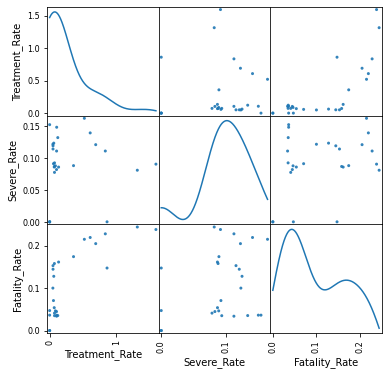

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_c_EN_SM[['Treatment_Rate','Severe_Rate','Fatality_Rate']], alpha=0.9, figsize=(6, 6), diagonal='kde')

<font face="微软雅黑" size=3 color=BLUE >Random take three features to do scatter plot, from the observation to points' distributions, no other markable comments made

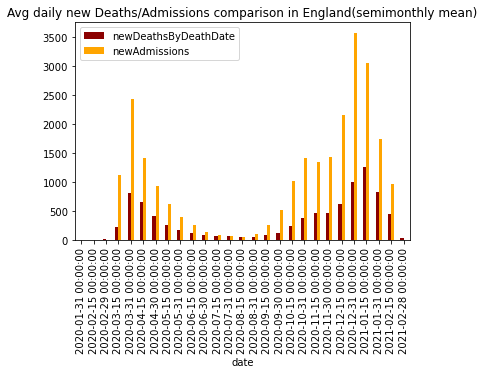

In [23]:
df_c_EN_SM[['newDeathsByDeathDate','newAdmissions']].plot(kind='bar',
                                    title='Avg daily new Deaths/Admissions comparison in England(semimonthly mean)',
                                    color=['darkred','orange'])

<font face="微软雅黑" size=3 color=BLUE > Daily admissions trend is almost same with daily deaths, both indicates the load of hospital in the different period

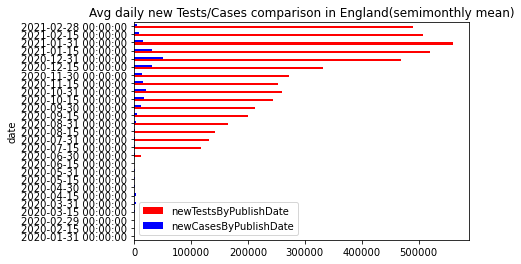

In [24]:
df_c_EN_SM[['newTestsByPublishDate','newCasesByPublishDate']].plot(kind='barh',
                                    title='Avg daily new Tests/Cases comparison in England(semimonthly mean)',
                                    color=['red','blue'])

<font face="微软雅黑" size=3 color=BLUE > England Daily tests is way huger than daily new cases, the test starts at later June,2020, reach by nearly 600,000 at peak, daily new cases' burst is almost in that period.
Relatively small new cases in early period of 2020, but with high *Fatality Rate* as we discussed before

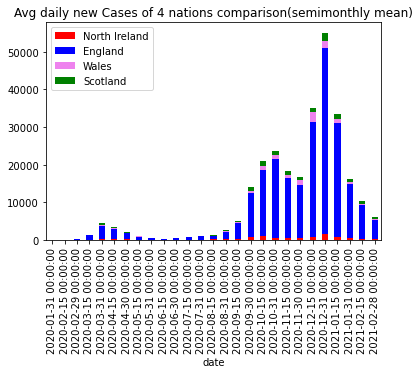

In [25]:
pd.concat([df_c_NI_SM['newCasesByPublishDate'],df_c_EN_SM['newCasesByPublishDate'],
           df_c_WL_SM['newCasesByPublishDate'],df_c_SC_SM['newCasesByPublishDate']], axis=1).plot(kind='bar',
                                    stacked=True,
                                    title='Avg daily new Cases of 4 nations comparison(semimonthly mean)',
                                    color=['red','blue','violet','green'])
label=['North Ireland','England','Wales','Scotland']
plt.legend(label,loc=2)
plt.show()

<font face="微软雅黑" size=3 color=BLUE > In the aspect of daily new cases' devotion to the UK, **England** dominates. \
    Also the trend of 4 nations are similar

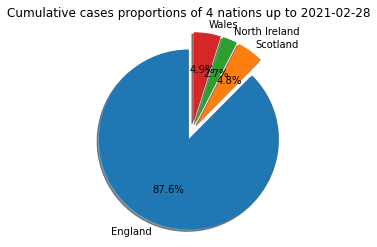

In [26]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'England', 'Scotland', 'North Ireland', 'Wales'
sum=df_c_EN['cumCasesByPublishDate'].values[0]+df_c_WL['cumCasesByPublishDate'].values[0]+df_c_SC['cumCasesByPublishDate'].values[0]+ \
df_c_NI['cumCasesByPublishDate'].values[0]
sizes = [df_c_EN['cumCasesByPublishDate'].values[0]/sum*100, 
        df_c_SC['cumCasesByPublishDate'].values[0]/sum*100,
        df_c_NI['cumCasesByPublishDate'].values[0]/sum*100,
        df_c_WL['cumCasesByPublishDate'].values[0]/sum*100]
explode = (0.1, 0.1, 0.1, 0.1)  

fig1, ax4= plt.subplots()
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title('Cumulative cases proportions of 4 nations up to 2021-02-28')
plt.show()

<font face="微软雅黑" size=3 color=BLUE >In this pandemic, **England** occupies most by 87.6% in proportion of cumulative cases up to 2021-02-28, followed by **Wales**(4.9%),**Scotland**(4.8%),**North Ireland**(2.7%)

<font face="微软雅黑" size=4 color=ViOLET > Conclusion:
Three rates I designed is based on the relatively reasonable assumptions, detailedly it will have some differences. For example, in the early period of pandemic, the beds with ventilators are not that enough, since I design **Severe_Rate=covidOccupiedMVBeds(affected)/hospitalCases**, in reality the severe cases can be more. 
In December 2020, UK reported the new covid variant, this may contribute a burst of 4 nations at that time, the data I picked from **Wales/Scotland/North Ireland**, no matter in quality or significance aspect, is worse than that of **England**, hope there will be some improvement.
